### Import libraries and Dataset

In [1]:
# Import libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the path
parent_dir = Path.cwd().parent
data_dir = parent_dir / 'data'
input_path = data_dir / 'Online Retail.xlsx'

# Load the dataset
df = pd.read_excel(input_path)

# Check the head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Initial EDA and Data Cleaning

In [3]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


It seems that some `CustomerID` values and `Description` are missing in the dataset.

In [4]:
# Calculate the ratio of missingness 
miss_ratio_customerid = df['CustomerID'].isna().sum() / len(df['Country']) * 100

miss_ratio_description = df['Description'].isna().sum() / len(df['Country']) * 100

print(f'Missing ration of CustomrID is {miss_ratio_customerid}%')
print(f'Missing ration of Description  is {miss_ratio_description}%')

Missing ration of CustomrID is 24.926694334288598%
Missing ration of Description  is 0.2683107311375157%


In [5]:
# Subset the rows with missing values and take a peek
df_missing = df[df['CustomerID'].isna() | df['Description'].isna()]

df_missing.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [6]:
# Check if CustomerID is missing whenever Description is missing
# Subset rows that have missing values in Description 
df_missing_desc = df[df['Description'].isna()]

df_missing_desc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [7]:
# Compare the number of total rows and the number of rows that has missing values in CustomerID
print(f'the number of rows in missing_desc is {len(df_missing_desc)}')
print(f"the number of rows that have missing values in CustomerID in missing desc is {df_missing_desc['CustomerID'].isna().sum()}")

the number of rows in missing_desc is 1454
the number of rows that have missing values in CustomerID in missing desc is 1454


### Insight of Missing Data
After examining the dataset, three key insights were identified regarding missing values:
1. **Whenever 'Description is missing, `CustomerID` is also missing.**
2. **The proportion of missing values in `Description` is approximately 0.27%.**
3. **The proportion of missing values in `CustomerID` is approximately 25%**

### Decisions on Handling Missing Values
1. **Drop rows with missing `Description`.**

   Since only about 0.27% of rows are affected and these rows also lack `CustomerID`, which means there removal has a negligible impact on the dataset and the records provide little meaningful information for analysis.

2. **Drop rows with missing `CustomerID`**

   Although around 25% of the records are affected, `CustomerID` is essential for performing customer segmentation - the main goal of this project. 
   
   On top of that, even after removing these rows, over **406,000 valid records** remain, which is more than sufficient for robust analysis.

In [8]:
# Make a copy of df to secure original dataset
df_copy_1 = df.copy()

# Drop the rows with missing values
df_drop = df_copy_1.dropna(subset=['Description', 'CustomerID'])

# Confirm whether missing values are dropped
df_drop.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Check the information of the new dataset
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Now, the missing values have been successfully dropped.

I will check `UnitPrice` and `Quantity` columns to ensure there are no negative values.

In [10]:
# Check the UnitPrice column
unit_nev = df_drop[df_drop['UnitPrice'] < 0]

# Check the Quantity column
quan_nev = df_drop[df_drop['Quantity']<0]

# Check whether they have negative values
print(f"The number of negative values in UnitPrice is {len(unit_nev['UnitPrice'])}")
print(f"The number of negative values in Quantity is {len(quan_nev['Quantity'])}")

The number of negative values in UnitPrice is 0
The number of negative values in Quantity is 8905


The Quantity columns seems to have lots of negative values. Let's investigate them.

In [11]:
# Check the head
quan_nev.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


All invoice numbers start from `C`, which could indicate product cancellations. I will investigate this further.

At first, I hypothesized that for each cancellation(e.g. C536379), there might be corresponding original invoice without the `C` prefix(e.g.536379). To test this assumption, I will check whether such invoice numbers exist in the dataset.

In [12]:
# Get a list of invoice numbers from the from the first 10 rows
lst_inv_c = quan_nev.iloc[:10]['InvoiceNo'].to_list()
lst_inv_c 

['C536379',
 'C536383',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536506']

In [13]:
# Take out Cs from the invoice numbers and create a list
# Create an empty list to store the invoice numbers without C
lst_inv_nc = []

# Drop c from each element and append it to the list
for inv in lst_inv_c:
    lst_inv_nc.append(inv[1:])

lst_inv_nc

['536379',
 '536383',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536506']

In [14]:
# Merge the lists to subset the DataFrame
lst_inv_sub = lst_inv_c + lst_inv_nc
lst_inv_sub

['C536379',
 'C536383',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536391',
 'C536506',
 '536379',
 '536383',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536506']

In [15]:
# Subset the rows
df_drop_inv_sub = df_drop[df_drop['InvoiceNo'].isin(lst_inv_sub )]

df_drop_inv_sub

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


**Investigating Potential Original Transactions**

The corresponding invoice numbers without `C` prefix don't seem to exist. It seems that it sometimes represent **discounts, but not all the time**. Therefore, I will look for records that have exactly the same `StockCode` and `CustomerID` as **the last 10 Orders** with invoice numbers starting with `C`, to investigate whether they represent the original transactions.

I chose **the last 10 records** because if my hypothesis is correct, the original purchases should occur **before** the cancellations. By selecting the last ones, I can avoid cases whether the cancellation appears at the beginning of the dataset, where its corresponding original record might not have been captured.



In [16]:
# Slice the last 10 records
quan_nev_last_10 = quan_nev.iloc[-10:]
quan_nev_last_10 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom
540142,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,2011-12-08 19:26:00,0.39,13599.0,United Kingdom
540176,C581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
# Get the rows that have exactly the same 'StockCode' and 'CustomerID' as the last 10 records in the df_drop
df_drop_sc_last_10 = df_drop[df_drop['StockCode'].isin(quan_nev_last_10['StockCode']) & df_drop['CustomerID'].isin(quan_nev_last_10['CustomerID'])]
df_drop_sc_last_10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9197,537195,21258,VICTORIAN SEWING BOX LARGE,8,2010-12-05 13:55:00,10.95,15311.0,United Kingdom
17101,537680,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2010-12-08 10:11:00,1.25,13599.0,United Kingdom
21362,538076,84978,HANGING HEART JAR T-LIGHT HOLDER,36,2010-12-09 14:15:00,1.06,15311.0,United Kingdom
21364,538076,21258,VICTORIAN SEWING BOX LARGE,8,2010-12-09 14:15:00,10.95,15311.0,United Kingdom
28606,C538650,21258,VICTORIAN SEWING BOX LARGE,-1,2010-12-13 15:05:00,10.95,15311.0,United Kingdom
...,...,...,...,...,...,...,...,...
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541744,581571,21258,VICTORIAN SEWING BOX LARGE,8,2011-12-09 12:00:00,10.95,15311.0,United Kingdom


Since there are many matches, I will examine the first 10 records for clarity.

In [18]:
# Check the first 10 records
df_drop_sc_last_10.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9197,537195,21258,VICTORIAN SEWING BOX LARGE,8,2010-12-05 13:55:00,10.95,15311.0,United Kingdom
17101,537680,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2010-12-08 10:11:00,1.25,13599.0,United Kingdom
21362,538076,84978,HANGING HEART JAR T-LIGHT HOLDER,36,2010-12-09 14:15:00,1.06,15311.0,United Kingdom
21364,538076,21258,VICTORIAN SEWING BOX LARGE,8,2010-12-09 14:15:00,10.95,15311.0,United Kingdom
28606,C538650,21258,VICTORIAN SEWING BOX LARGE,-1,2010-12-13 15:05:00,10.95,15311.0,United Kingdom
34542,539404,84978,HANGING HEART JAR T-LIGHT HOLDER,6,2010-12-17 12:24:00,1.25,17315.0,United Kingdom
42548,540005,22178,VICTORIAN GLASS HANGING T-LIGHT,15,2011-01-04 10:38:00,1.25,17315.0,United Kingdom
44161,540157,21258,VICTORIAN SEWING BOX LARGE,8,2011-01-05 11:41:00,10.95,15311.0,United Kingdom
64607,C541656,22178,VICTORIAN GLASS HANGING T-LIGHT,-1,2011-01-20 12:07:00,1.25,17315.0,United Kingdom
69108,541950,21314,SMALL GLASS HEART TRINKET POT,8,2011-01-24 12:13:00,2.10,15498.0,United Kingdom


In [19]:
# Slice the relevant transactions of 2 C invoices above
df_drop_sc_last_10_2 = df.iloc[[21364,28606,42548,64607]]
df_drop_sc_last_10_2 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21364,538076,21258,VICTORIAN SEWING BOX LARGE,8,2010-12-09 14:15:00,10.95,15311.0,United Kingdom
28606,C538650,21258,VICTORIAN SEWING BOX LARGE,-1,2010-12-13 15:05:00,10.95,15311.0,United Kingdom
42548,540005,22178,VICTORIAN GLASS HANGING T-LIGHT,15,2011-01-04 10:38:00,1.25,17315.0,United Kingdom
64607,C541656,22178,VICTORIAN GLASS HANGING T-LIGHT,-1,2011-01-20 12:07:00,1.25,17315.0,United Kingdom


### Interpreting Negative Values in the `Quantity` Column

From the inspected records with invoice numbers starting with `C`, it appears that some of them have corresponding orders that occurred earlier.

This suggest that these entries likely represent **cancellation transactions.** The negative values also sometimes seem to indicate **discounts**.

Therefore, I decide to retain the rows with negative values in the `Quantity` column, as they contain potentially useful information about **cancellation and discounts**.

### StockCode 'M'
While investigating negative quantities, I also noticed several rows where `StockCode` is **M** and the `Description` is **Manual**.

These transactions may represent **system- or staff-initiated corrections**, used to adjust errors or reconcile accounts.

If this assumption is correct, entries with `StockCode` == `M` should appear with both positive and negative quantities, reflecting adjustments to previous transactions rather than normal customer purchases.

In addition, `StockCode` values consisting of a single character seem to have special meanings. For example, `D` for **Discount** and `M` for **Manual**.

Therefore, I will investigate all rows where the `StockCode` is only one character long to understand whether they represent special transaction types.

In [20]:
# Select rows where'StockCode' consists of only one character
df_drop_single = df_drop[df_drop['StockCode'].str.len() == 1]

# Display the unique one-character 'StockCode' values
df_drop_single['StockCode'].unique()

array(['D', 'M'], dtype=object)

There are only two single-character 'StockCode' values in the dataset:

'D', representing **Discount**, and `M`, representing **Manual**. I have already checked **Discount**. Therefore, I will only investigate **Manual**.

In [21]:
# Check the rows where `StockCode` consists of 'M' 
df_drop_single_m = df_drop_single[df_drop_single['StockCode'] == 'M']
df_drop_single_m

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


It seems that rows where `StockCode` == `M` represent **system- or staff-initiated corrections**, used to adjust errors or reconcile accounts, as previously suspected. 

These entries contain both positive and negative quantities, suggesting that they are not typical customer purchases. Such records could **skew the analysis** later because they do not reflect actual customer behavior. 

However, **I will retain these rows for now because excluding them would make it difficult to accurately calculate the total monetary value associated with each customer**. I will decide how to handle them after completing the data cleaning process and starting actual analysis.
 

### Check for Duplicates Records

In this step, I investigate whether the dataset contains any duplicate rows, which could distort the analysis and leas to inaccurate insights.


In [22]:
# Check the number of duplicates
df_drop.duplicated().sum()


5225

There are 5225 duplicates. Let's take a peek of some rows.

In [23]:
# Slice the duplicated rows
# Sort the rows according to each column so that the duplicated rows are shown side by side
df_drop_duprow = df_drop[df_drop.duplicated(keep=False)].sort_values(by=df_drop.columns.to_list())

df_drop_duprow.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


After inspecting the dataset, the duplicated rows appear to be pure duplicates - meaning every column value is identical. These are most likely caused by data entry or system errors, rather than genuine repeated transactions. 

The number of duplicates is **not small (5,225)**, but since the dataset contains **more than 40,000 records**, there is still plenty of data available for analysis.

Therefore, I will **remove all exact duplicate rows** to ensure data integrity and avoid overcounting in further analysis.

In [24]:
# Drop pure duplicate rows
df_dup_drop = df_drop.drop_duplicates()

# Verify that all duplicates have been removed
df_dup_drop.duplicated().sum()

0

In [25]:
# Check the info of the new DataFrame
df_dup_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


Now, all duplicated rows has been dropped.

### Investigate Inconsistency in Columns with Object Datatype



`InvoiceNo` and `StockCode` contain a mixture of numbers and characters. I will check whether these numbers are stored as *strings* to ensure data consistency and prevent potential issues in later analysis.

In [26]:
# Count datatypes in each column
inv_typ_1 = df_dup_drop['InvoiceNo'].apply(type).value_counts()
st_typ_1 = df_dup_drop['StockCode'].apply(type).value_counts()
print(inv_typ_1)
print(st_typ_1 )

InvoiceNo
<class 'int'>    392732
<class 'str'>      8872
Name: count, dtype: int64
StockCode
<class 'int'>    366179
<class 'str'>     35425
Name: count, dtype: int64


Both columns contain int. I will change all the values in both columns to string.

In [27]:
# Make a copy of df_dup_drop to avoid SettingWithCopyWarning
df_dup_drop_copy_1 = df_dup_drop.copy()

# Change all the datatype in the columns to string
df_dup_drop_copy_1['InvoiceNo'] = df_dup_drop_copy_1['InvoiceNo'].astype('str')
df_dup_drop_copy_1['StockCode'] = df_dup_drop_copy_1['StockCode'].astype('str')

# Confirm the datatype in each column is corrected
inv_typ_2 = df_dup_drop_copy_1['InvoiceNo'].apply(type).value_counts()
st_typ_2 = df_dup_drop_copy_1['StockCode'].apply(type).value_counts()

print(inv_typ_2)
print(st_typ_2)


InvoiceNo
<class 'str'>    401604
Name: count, dtype: int64
StockCode
<class 'str'>    401604
Name: count, dtype: int64


Now, all the values in `InvoiceNo` and `StockCode` columns successfully converted as strings.

Next, I will investigate `Country` column whether they contain inconsistent values like **United Kingdom** and **united kingdom**.

In [28]:
# Get the unique values in the country columns
country_unique_1 = df_dup_drop_copy_1['Country'].unique()
country_unique_1

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

The values in this column appear to be clean, but be certain, I will perform additional checks to verify consistency.

In [29]:
# Check the number of unique values
len(country_unique_1)

37


First, check whether there are inconsistencies with capitalization and spaces in the bigging and end.

In [30]:
# Create a new column to detect inconsistency
df_dup_drop_copy_1['Country_lower'] = df_dup_drop_copy_1['Country'].str.lower().str.strip()

print('Original unique:', df_dup_drop_copy_1['Country'].nunique())
print('Lowercase unique:', df_dup_drop_copy_1['Country_lower'].nunique())

Original unique: 37
Lowercase unique: 37


With capitalization and spaces in the begging and end, values seem to be consistence.

Next, I will check where there are typos or inconsistent spaces inside a string.

In [31]:
# Import libraries
from itertools import combinations   #   To make all unique combinations of values to compare
from rapidfuzz import fuzz

#Since there is no inconsistency with capitalization and spaces, use original 'Country' column to detect typos and inconsistent spaces
# Create a list to save the result of the check
results = []

# Make all the possible combination of unique value and calculate the similarity scores
# Threshold set to 80 to capture values that are similar but not identical
# This helps identify potential typos(e.g. 'United Kingdom vs 'United Kindom') without detecting unrelated names
# If the score is more than 80, append the combination and score in the results list

for a, b in combinations(country_unique_1, 2):
    score = fuzz.ratio(a, b)
    if score >= 80:
        results.append((a, b, score))

# Print the result
print(results)

[('Australia', 'Austria', 87.5)]


`Australia` and `Austria` are different country and not a typo and only this pair is detected, which means there aren't inconsistent spaces and typos. Therefore, `Country` column is clean and consistent.

In [32]:
# Drop the column used for validation and check the information of the cleaned DataFrame
df_dup_drop_copy_1 = df_dup_drop_copy_1.drop(columns='Country_lower')
df_dup_drop_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


### RFM Analysis

**RFM** stands for **Recency**, **Frequency** and **Monetary**. These are three key metrics used in marketing and customer analytics to describe customer behavior.

1. **Recency**
How recently customer made a purchase - The number of days since the customer's last purchase(relative to a reference date, e.g. the last date in your dataset)

2. **Frequency**
How of often a customer makes purchases - The total number of invoices(transactions) by the customers

3. **Monetary**
How much money the customer spent - The total monetary value of purchase

### Problems of Rows with minus quantities and 'StockCODE' == 'M' 
As I investigated above, there are rows with negative quantities that are **discounts** and **cancellation**. On top of that, there are rows where `StockCode` == 'M', which appear to represent **system- or staff-initiated corrections**. These rows could skew the outcomes of RFM analysis. Therefore I will conduct the analysis in the following steps.

1. **Separate the DataFrame**
Separate the DataFrame into 4, which are; 
- **rows with discounts**
- **rows with Manual** 
- **rows with cancellation** 
- **Other rows**, which are pure valid purchase histories.

2. **Compute RFM, but with M as adjusted Monetary**
- Calculate Recency and Frequency using valid transactions only. (**Other rows**)
- Compute **Adjusted Monetary** metric excluding discounts, cancellation, and manual corrections.

3. **Use Flags for Interpretation**
- Crate flag columns to interpret how discounts and cancellations relate to different customer segments later.



In [ ]:
# Make a copy of the cleaned DataFrame
df_cleaned = df_dup_drop_copy_1.copy()

# Check the information of the DataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
# Create Monetary per row 
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Make flags. 1 is True and 0 is False 
df_cleaned['IsDiscount'] = (df_cleaned['StockCode'] == 'D').astype('int')
df_cleaned['IsManual'] = (df_cleaned['StockCode'] == 'M').astype('int')
df_cleaned['IsCancellation'] = ((df_cleaned['Quantity'] < 0) & ~df_cleaned['StockCode'].isin(['M', 'D'])).astype('int')

# Check the info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       401604 non-null  object        
 1   StockCode       401604 non-null  object        
 2   Description     401604 non-null  object        
 3   Quantity        401604 non-null  int64         
 4   InvoiceDate     401604 non-null  datetime64[ns]
 5   UnitPrice       401604 non-null  float64       
 6   CustomerID      401604 non-null  float64       
 7   Country         401604 non-null  object        
 8   TotalPrice      401604 non-null  float64       
 9   IsDiscount      401604 non-null  int32         
 10  IsManual        401604 non-null  int32         
 11  IsCancellation  401604 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 35.2+ MB


In [35]:
# Do the validation of the flags
# The Number of rows where Quantity is negative
num_negative = len(df_cleaned[df_cleaned['Quantity'] < 0])

# Sum of the flag
# Slice only negative Quantity for Manual since Manual also has positive Quantity
sum_flag = df_cleaned['IsCancellation'].sum() + df_cleaned['IsDiscount'].sum() + df_cleaned.loc[df_cleaned['Quantity'] < 0, 'IsManual'].sum()  

print(f'The number of negative rows is {num_negative}')
print(f'The number of total positive flags is {sum_flag}')

The number of negative rows is 8872
The number of total positive flags is 8872


`TotalPrice` and all flag columns (`IsDicount`, `IsManual`, `IsCancellation`) have been correctly calculated. 

In [36]:
# Define valid purchase
# Create a mask to slice the DataFrame
mask_valid = (df_cleaned['Quantity'] >= 0) & (df_cleaned['IsManual'] == 0)

# Slice the DataFrame and make a copy
df_valid = df_cleaned[mask_valid].copy()
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392447 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392447 non-null  object        
 1   StockCode       392447 non-null  object        
 2   Description     392447 non-null  object        
 3   Quantity        392447 non-null  int64         
 4   InvoiceDate     392447 non-null  datetime64[ns]
 5   UnitPrice       392447 non-null  float64       
 6   CustomerID      392447 non-null  float64       
 7   Country         392447 non-null  object        
 8   TotalPrice      392447 non-null  float64       
 9   IsDiscount      392447 non-null  int32         
 10  IsManual        392447 non-null  int32         
 11  IsCancellation  392447 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 34.4+ MB


In [37]:
# Compute Recency
# Snapshot date: day after the last valid purchase as a reference point
snapshot_date = df_valid['InvoiceDate'].max() + pd.Timedelta(days=1)

# Recency = day since last valid purchase
recency = df_valid.groupby('CustomerID')['InvoiceDate'].max().rsub(snapshot_date).dt.days.rename('Recency')

recency

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: Recency, Length: 4336, dtype: int64

In [38]:
# Frequency 
frequency = df_valid.groupby('CustomerID')['InvoiceNo'].nunique().rename('Frequency')

frequency

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: Frequency, Length: 4336, dtype: int64

In [39]:
# Adjusted Monetary
# First calculate non adjusted monetary
purchases = df_valid.groupby('CustomerID')['TotalPrice'].sum().rename('Purchase')

# Calculate sum of cancellation
# Take absolute values so that it can be subtracted correctly
cancels = df_cleaned[df_cleaned['IsCancellation'] == 1].groupby('CustomerID')['TotalPrice'].sum().abs().rename('Cancel')

# Calculate sum of discounts
# Take absolute values so that it can be subtracted correctly
discounts = df_cleaned[df_cleaned['IsDiscount'] == 1].groupby('CustomerID')['TotalPrice'].sum().abs().rename('Discount')

# Calculate sum of Manual
# Take absolute values so that it can be subtracted correctly
manuals = df_cleaned[df_cleaned['IsManual'] == 1].groupby('CustomerID')['TotalPrice'].sum().abs().rename('Manual')

# Combine the series 
# Filter to include only customers preset in 'purchase' since due to the selected time window, some discounts or cancellations may not have corresponding purchases within this period.
mon_results = pd.concat([purchases, cancels, discounts, manuals], axis=1).fillna(0).loc[purchases.index]

# Compute Adjust Monetary
adj_monetary = (mon_results['Purchase'] - mon_results['Cancel'] - mon_results['Discount'] - mon_results['Manual']) .rename('AdjMonetary')
adj_monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2033.63
18287.0    1837.28
Name: AdjMonetary, Length: 4336, dtype: float64

In [40]:
# Check the negative values
# Negative Adjusted Monetary values occur because the dataset covers a restricted time window, and orders before cancellations or refunds do not exist in this dataset.
neg_customers = adj_monetary[adj_monetary < 0]

neg_customers

CustomerID
13672.0     -71.46
14437.0     -43.40
15581.0   -1990.91
15823.0    -840.76
15935.0    -200.78
16454.0      -8.15
16546.0     -95.93
17548.0    -141.48
17603.0   -1165.30
17940.0   -1718.54
Name: AdjMonetary, dtype: float64

In [41]:
# Check the ratio of the negative values
print(f'Total customer counts: {len(adj_monetary)}')
print(f'Negative customer counts: {len(neg_customers)}')
print(f'Percentage: {len(neg_customers) / len(adj_monetary) * 100:.2f}%')

Total customer counts: 4336
Negative customer counts: 10
Percentage: 0.23%


Since customers with negative Adjusted Monetary values represent less than 1% of our base (out of more than 4,000 customers), and these cases result from a restricted analysis time window where cancellations exist without corresponding purchases, they do not reflect true customer value behavior.

Therefore, these customers will be excluded from the RFM analysis after the full dataset is constructed.

In [42]:
# Create RFM table
rfm = pd.concat([recency, frequency, adj_monetary], axis=1).fillna(0)
rfm.head()

,Recency,Frequency,AdjMonetary
CustomerID,,,
12346.0,326,1,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [43]:
# Check the information of rfm
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      4336 non-null   int64  
 1   Frequency    4336 non-null   int64  
 2   AdjMonetary  4336 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.5 KB


In [44]:
# Create customer level flags
rfm_flags= df_cleaned.groupby('CustomerID').agg(HadCancellation = ('IsCancellation', 'sum'),
                                                HadDiscounts = ('IsDiscount', 'sum'),
                                                HadManual = ('IsManual', 'sum')
                                                ) 

rfm_flags

,HadCancellation,HadDiscounts,HadManual
CustomerID,,,
12346.0,1,0,0
12347.0,0,0,0
12348.0,0,0,0
12349.0,0,0,0
12350.0,0,0,0
...,...,...,...
18280.0,0,0,0
18281.0,0,0,0
18282.0,1,0,0


In [45]:
# Merge the flags to rfm
rfm_merged = rfm.join(rfm_flags, how='left').fillna(0)

# Check te head of the merged DataFrame
rfm_merged.head()

,Recency,Frequency,AdjMonetary,HadCancellation,HadDiscounts,HadManual
CustomerID,,,,,,
12346.0,326,1,0.00,1,0,0
12347.0,2,7,4310.00,0,0,0
12348.0,75,4,1797.24,0,0,0
12349.0,19,1,1757.55,0,0,0
12350.0,310,1,334.40,0,0,0


In [46]:
# Check the information of te merged DataFrame
rfm_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          4336 non-null   int64  
 1   Frequency        4336 non-null   int64  
 2   AdjMonetary      4336 non-null   float64
 3   HadCancellation  4336 non-null   int32  
 4   HadDiscounts     4336 non-null   int32  
 5   HadManual        4336 non-null   int32  
dtypes: float64(1), int32(3), int64(2)
memory usage: 315.4 KB


It could be useful to add a `Country` column to `rfm_merged` to gain additional insights after clustering. However, some customers may have purchased products from more than one country. I will investigate this before deciding how to assign country information to each customer.

In [47]:
# Count how many distinct countries each customer has purchased from
country_counts = df_valid.groupby('CustomerID')['Country'].nunique()

# Identify customers associated with more than one country
multi_country_customers = country_counts[country_counts > 1]

# Display results and compute the summary statistics
print(f'The number of entire customers is {len(country_counts)}')
print(f'The number of multi country customers is {len(multi_country_customers)}')
print(f'The ratio of multi country customers is {len(multi_country_customers) / len(country_counts) * 100:.2f}%')

The number of entire customers is 4336
The number of multi country customers is 8
The ratio of multi country customers is 0.18%


In [48]:
# Check the countries of multi country customers
df_valid_multi_country = df_valid.loc[df_valid['CustomerID'].isin(multi_country_customers.index), ['CustomerID','Country']] .sort_values('CustomerID')
df_valid_multi_country.groupby('CustomerID')['Country'].unique()

CustomerID
12370.0           [Cyprus, Austria]
12394.0          [Belgium, Denmark]
12417.0            [Spain, Belgium]
12422.0    [Australia, Switzerland]
12429.0          [Denmark, Austria]
12431.0        [Australia, Belgium]
12455.0             [Cyprus, Spain]
12457.0       [Switzerland, Cyprus]
Name: Country, dtype: object

Although multi-country customers represent only 0.18% of the total, they may indicate exceptionally good or problematic customers. To retain this information for interpretation, I will add a flag to indicate which customers have transactions in multiple countries. I will keep only one column in the dataset and, for multi-country customers, assigned the first country that appeared since their proportion is extremely low. On top of that, with this flag, it is easy to identify and further investigate these eight customers if needed.

In [49]:
# Add a flag to identify multi-country customers
rfm_merged['IsMultiCountry'] = rfm_merged.index.isin(multi_country_customers.index).astype(int)

# Quick validation
rfm_merged['IsMultiCountry'].value_counts()

IsMultiCountry
0    4328
1       8
Name: count, dtype: int64

In [50]:
# Get a country name and if there are multiple countries get the first one
country_info = df_valid.groupby('CustomerID')['Country'].agg(lambda x: x.iloc[0])
country_info



CustomerID
12346.0    United Kingdom
12347.0           Iceland
12348.0           Finland
12349.0             Italy
12350.0            Norway
                ...      
18280.0    United Kingdom
18281.0    United Kingdom
18282.0    United Kingdom
18283.0    United Kingdom
18287.0    United Kingdom
Name: Country, Length: 4336, dtype: object

In [51]:
# Add a country column
rfm_merged_2 = rfm_merged.join(country_info, how='left')
rfm_merged_2.head()

,Recency,Frequency,AdjMonetary,HadCancellation,HadDiscounts,HadManual,IsMultiCountry,Country
CustomerID,,,,,,,,
12346.0,326,1,0.00,1,0,0,0,United Kingdom
12347.0,2,7,4310.00,0,0,0,0,Iceland
12348.0,75,4,1797.24,0,0,0,0,Finland
12349.0,19,1,1757.55,0,0,0,0,Italy
12350.0,310,1,334.40,0,0,0,0,Norway


In [52]:
# Drop the customers with negative AdjMonetary
rfm_final = rfm_merged_2[rfm_merged_2['AdjMonetary'] >= 0]

In [53]:
# Check the information
rfm_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4326 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          4326 non-null   int64  
 1   Frequency        4326 non-null   int64  
 2   AdjMonetary      4326 non-null   float64
 3   HadCancellation  4326 non-null   int32  
 4   HadDiscounts     4326 non-null   int32  
 5   HadManual        4326 non-null   int32  
 6   IsMultiCountry   4326 non-null   int32  
 7   Country          4326 non-null   object 
dtypes: float64(1), int32(4), int64(2), object(1)
memory usage: 236.6+ KB


### K-Means Clustering
RFM data is prepared. I will implement K-Means clustering at first.

In [54]:
# Get the statistics of RFM
rfm_final[['Recency', 'Frequency', 'AdjMonetary']].describe()

,Recency,Frequency,AdjMonetary
count,4326.000000,4326.000000,4326.000000
mean,92.377716,4.263061,1912.390170
std,99.987202,7.668216,8256.071988
min,1.000000,1.000000,0.000000
25%,18.000000,1.000000,299.122500
50%,51.000000,2.000000,650.590000
75%,141.750000,5.000000,1617.422500
max,374.000000,206.000000,279489.020000


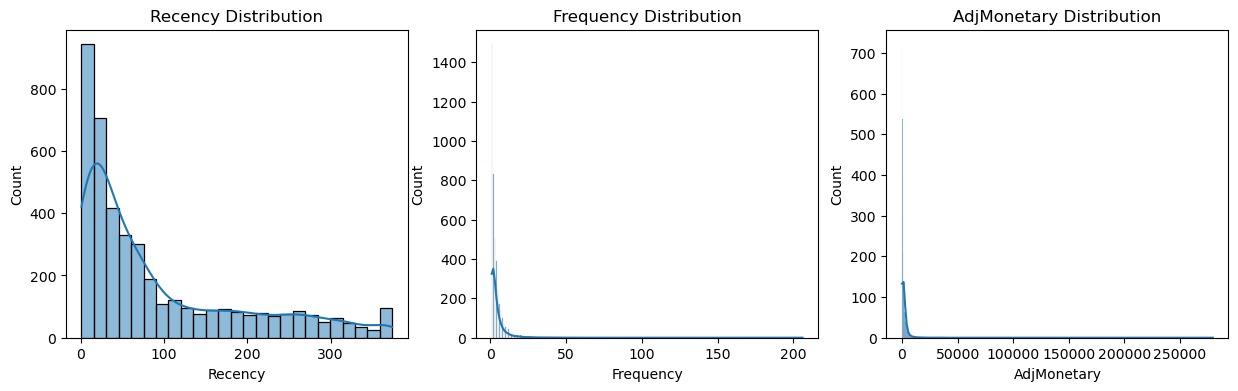

In [55]:
# Plot the each each feature
# Set a grid
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot a histogram 
for i, col in enumerate(['Recency', 'Frequency', 'AdjMonetary']):
    sns.histplot(rfm_final[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.show()



The distribution of the three features are right-skewed. Since K-Means clustering is sensitive to feature scales and performs well when variables are roughly normally distributed, I will apply a log transformation to reduce skewness and make the data more suitable for scaling and clustering. 

In [56]:
# Apply log transform 
# Using log1p to handle zero safely (Log(1 + X))
rfm_log = np.log1p(rfm_final[['Recency', 'Frequency', 'AdjMonetary']])
rfm_log

,Recency,Frequency,AdjMonetary
CustomerID,,,
12346.0,5.789960,0.693147,0.000000
12347.0,1.098612,2.079442,8.368925
12348.0,4.330733,1.609438,7.494564
12349.0,2.995732,0.693147,7.472245
12350.0,5.739793,0.693147,5.815324
...,...,...,...
18280.0,5.631212,0.693147,5.201806
18281.0,5.204007,0.693147,4.404522
18282.0,2.197225,1.098612,5.179534


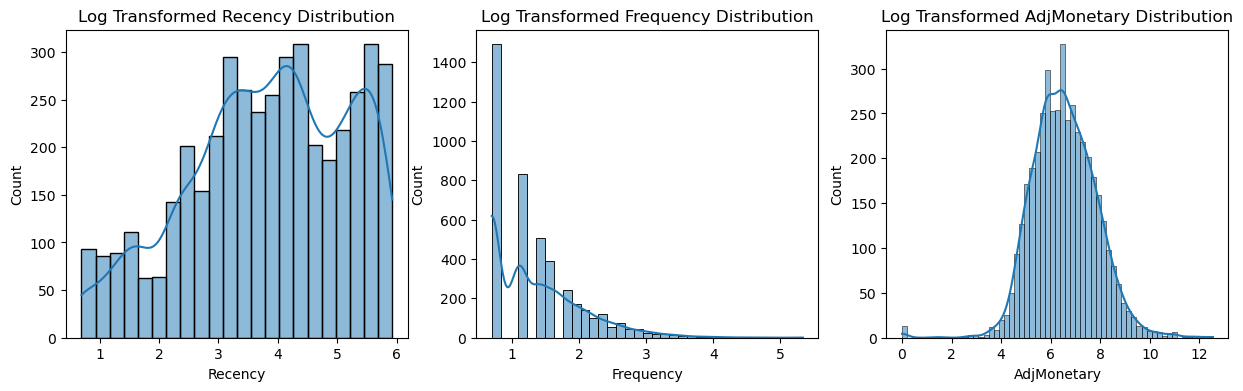

In [57]:
# Plot a graph of transformed features
# Set a grid
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# Plot a histogram
for i, col in enumerate(['Recency', 'Frequency', 'AdjMonetary']):
    sns.histplot(rfm_log[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Log Transformed {col} Distribution')

plt.show()

After applying a log 1p transformation to all RFM features, we observed that:
- **Adjusted Monetary is now close to a normal distribution.**
- **Recency shows improvement, but is still not normally distributed**
- **Frequency still remains strongly skewed.**

This indicates that a single transform method might not be optimal for all features. To ensure meaningful customer segmentation, I will now investigate Recency and Frequency features and find the most appropriate transformation methods for each.

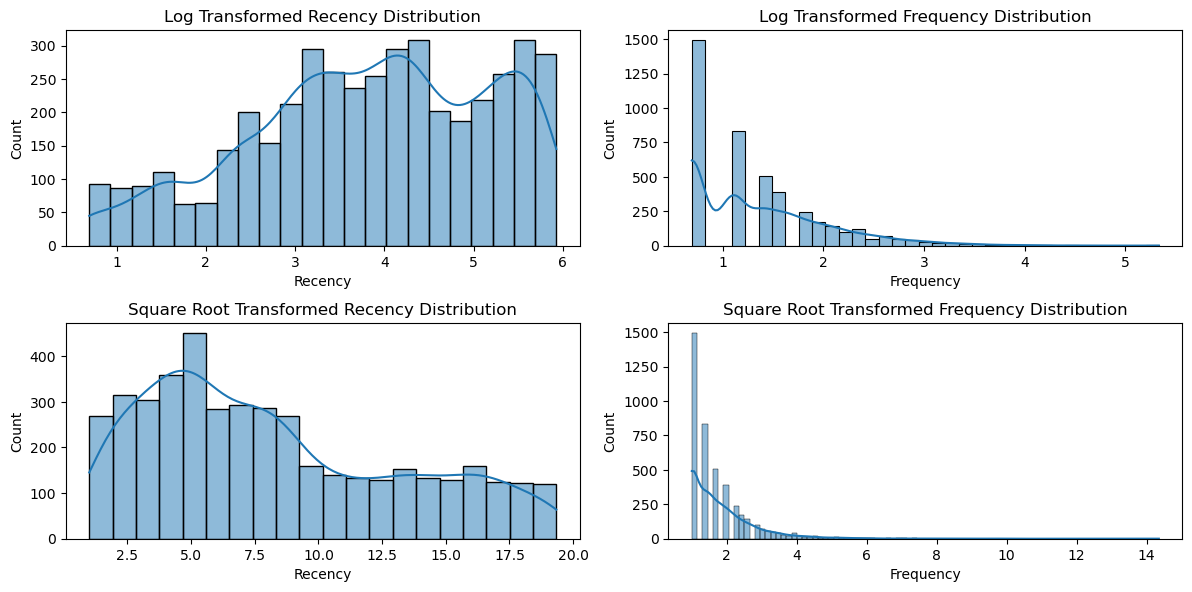

In [58]:
# Apply square root and compare
rfm_square = np.sqrt(rfm_final[['Recency', 'Frequency']])

# Plot graphs and compare
# Create a grid
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Make a title label
title = ['Log Transformed', 'Square Root Transformed']

# Plot the graphs
for i, data in enumerate([rfm_log, rfm_square]):
    for j, col in enumerate(['Recency', 'Frequency']):
        sns.histplot(data[col], kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'{title[i]} {col} Distribution')

plt.tight_layout(pad=1.0)   #    Preventing title squashing
plt.show()

Square root transformations aren't as successful as log transformation. So I decided to use log transformation for all the features. I well implement K-Means using this data.

### Choosing the Optimal Number of Clusters
To evaluate different values of k in K-Means clustering, I will use two common clustering quality metrics. I chose Inertia and Silhouette score because they complement each other: Inertia evaluates compactness internally, while Silhouette Score captures intra-cluster tightness and inter-cluster separation.

- Inertia : 

    Inertia measures how internally compact clusters are by summing the squared distance between each data point and its cluster centroid.

    $\text{Inertia of cluster }  j = \sum_{x_i \in C_j} \lVert x_i - \mu_j \rVert^2$

    $\text{Total Inertia} = \sum_{j=1}^{k} \sum_{x_i \in C_j} \lVert x_i - \mu_j \rVert^2$



    Interpretation:
    - Low inertia indicates more compact clusters
    - We look for an **Elbow Point** where improvement slows down (adding more clusters gives limited benefit).

- Silhouette Score:
   
    The silhouette score evaluates cluster quality by comparing how close points are to  their own cluster vs the nearest other cluster. This is also used to gauge the performance between different clustering methods. 
    
    per-sample Silhouette score:

    $s(i) = \frac{b(i) - a(i)}{\max(a(i),\, b(i))}$
    
    Overall silhouette score for the entire clustering

    $s = \frac{1}{n} \sum_{i=1}^{n} s(i)$
    
    Interpretation:
    - a = **average distance** to points in the **same** cluster 
    - b = **average distance** to points in the **nearest different** cluster
    - Score interpretation:
        - The score ranges from -1 to +1
        - **< 0:** Closer to a different cluster than the one it was assigned to - **likely misclustered**.
        - **Around 0:** Roughly equal distance to its own and the nearest neighboring clusters - **lies near boundary**
        - **Close to +1:** Much closer to points in its own cluster than to any other cluster - **likely well-clustered**

- 

In [59]:
# Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

# Scale each feature to implement KMeans clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# To decide the number of the clusters save inertia
# Track silhouette_score to gauge the quality of clustering as well
inertia = []
sil_score = []
K_range = range(2, 11)

for k in K_range:
    # Implement Kmeans clustering
    # n_init = number of intial centroid seeds tested
    # Kmeans runs multiple times with different starting points to avoid poor clustering from bad initialization
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)

    # Append the results of inertia and sill_score
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(rfm_scaled, labels))

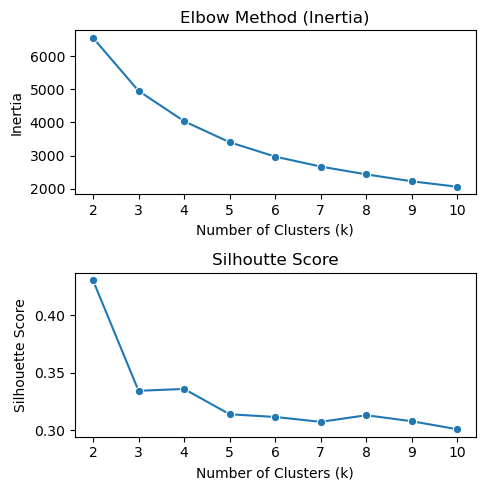

In [ ]:
# Plot graphs of inertias and silhouette_scores
# Set a grid
fig, axes = plt.subplots(2, 1, figsize=(5, 5))

# Plot inertias
sns.lineplot(x=list(K_range), y=inertia, marker='o', ax=axes[0])
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')

# Plot Sillhouette score
sns.lineplot(x=list(K_range), y=sil_score, marker='o', ax=axes[1])
axes[1].set_title('Silhoutte Score')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Based on the Elbow Method, the reduction in inertia slows down noticeably after **k=3**, indicating diminishing returns with additional clusters. Although the Silhouette Score peaks at **k=2**, that would likely under-segment the data. Since the Silhouette Score does not decrease (and actually increases slightly) between **k=3** and **k=4**, I will further investigate these values by visualizing the clusters using PCA.

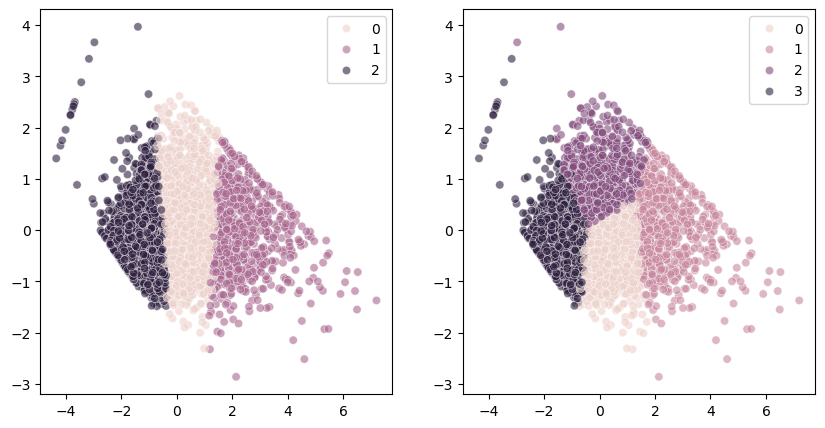

In [69]:
# Apply the best ks in the KMean
kmeans_3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels_3 = kmeans_3.fit_predict(rfm_scaled)

kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_labels_4 = kmeans_4.fit_predict(rfm_scaled)

# Create a grid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Apply PCA and plot each graph
for i, label in enumerate([kmeans_labels_3, kmeans_labels_4]):
    pca = PCA(n_components=2)
    rfm_pca_kmean = pca.fit_transform(rfm_scaled)

    # Plot the PCA graph
    sns.scatterplot(x=rfm_pca_kmean[:, 0], y=rfm_pca_kmean[:, 1], hue=label, alpha=0.6, ax=axes[i])

plt.show()

Both **k=3** and **k=4** produce well-separated clusters in the PCA visualization. However, I choose **k=4** and will investigate it further because the additional cluster may reveal more detailed insights about customer.behavior.

### Cluster Analysis

In [ ]:
# Create a copy of the DataFrame
rfm_final_cluster = rfm_final.copy()

# Add labels to original RFM
rfm_final_cluster['Cluster'] = kmeans_labels_4

# Get the summary statistics for each cluster
cluster_profile = rfm_final_cluster.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'AdjMonetary': ['mean', 'median', 'std'],
    })

cluster_profile['Count'] = rfm_final_cluster.groupby('Cluster').size()

cluster_profile[('AdjMonetary', 'sum')] = rfm_final_cluster.groupby('Cluster')['AdjMonetary'].sum()

# Calculate the percentage of the revenue 
cluster_profile[('AdjMonetary', "%_total_sum")] = cluster_profile[('AdjMonetary', 'sum')]  / cluster_profile[('AdjMonetary', 'sum')].sum() * 100

cluster_profile 

Recency                     Frequency                    \
               mean median         std       mean median        std   
Cluster                                                               
0         71.005008   57.0   55.575458   4.009182    4.0   1.795497   
1         12.191608    8.0   18.065348  13.699301   10.0  15.321135   
2         17.793976   17.0   11.664271   2.143373    2.0   1.086122   
3        183.876184  178.0  101.136337   1.304485    1.0   0.589219   

         AdjMonetary                        Count  AdjMonetary              
                mean   median           std                sum %_total_sum  
Cluster                                                                     
0        1601.615921  1284.65   1273.310761  1198  1918735.873   23.192746  
1        7535.374308  3596.01  19242.771156   715  5387792.630   65.125018  
2         541.386542   455.84    386.069733   830   449350.830    5.431534  
3         326.671220   277.41    243.036459  1583   517120.541    6.250702

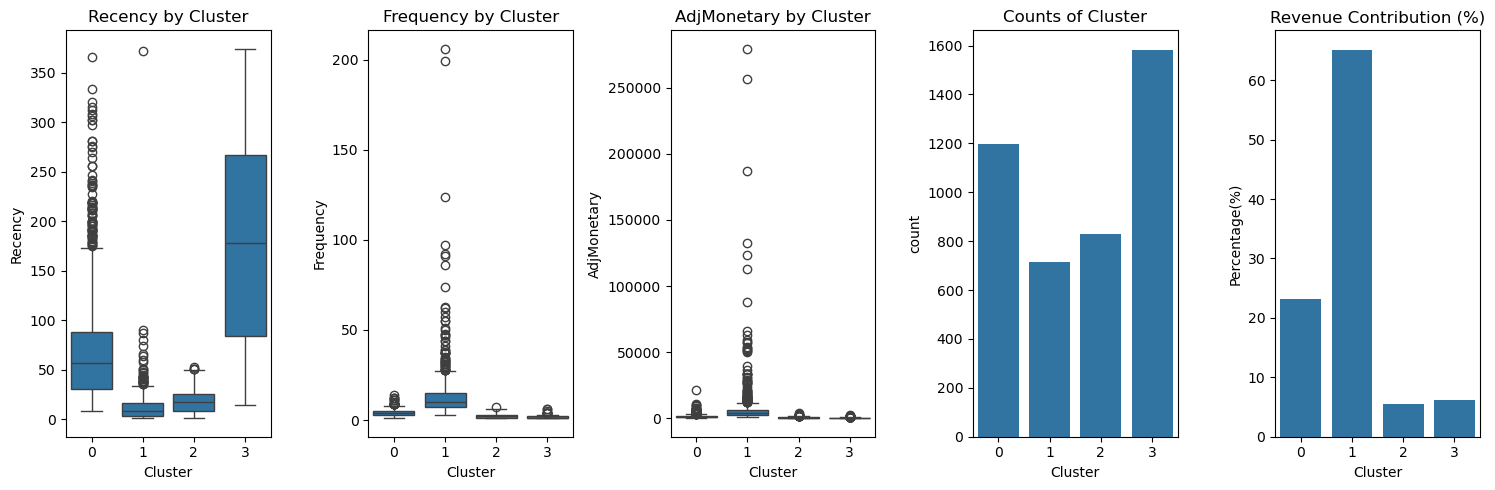

In [103]:
# Plot the summary statistics
# Create a grid
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot the graphs
for i, col in enumerate(['Recency', 'Frequency', 'AdjMonetary']):
    sns.boxplot(data=rfm_final_cluster, x='Cluster', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Cluster')

sns.countplot(data=rfm_final_cluster, x='Cluster', ax=axes[3])
axes[3].set_title('Counts of Cluster')

sns.barplot(data=cluster_profile['AdjMonetary'].reset_index(), x='Cluster', y='%_total_sum', ax=axes[4])
axes[4].set_title('Revenue Contribution (%)')
axes[4].set_ylabel('Percentage(%)')

plt.tight_layout()
plt.show()

Due to extreme outliers, the boxplots are hard to interpret on a normal scale. Therefore, I applied a log transformation to reduce skewness and better visualize the cluster patterns.

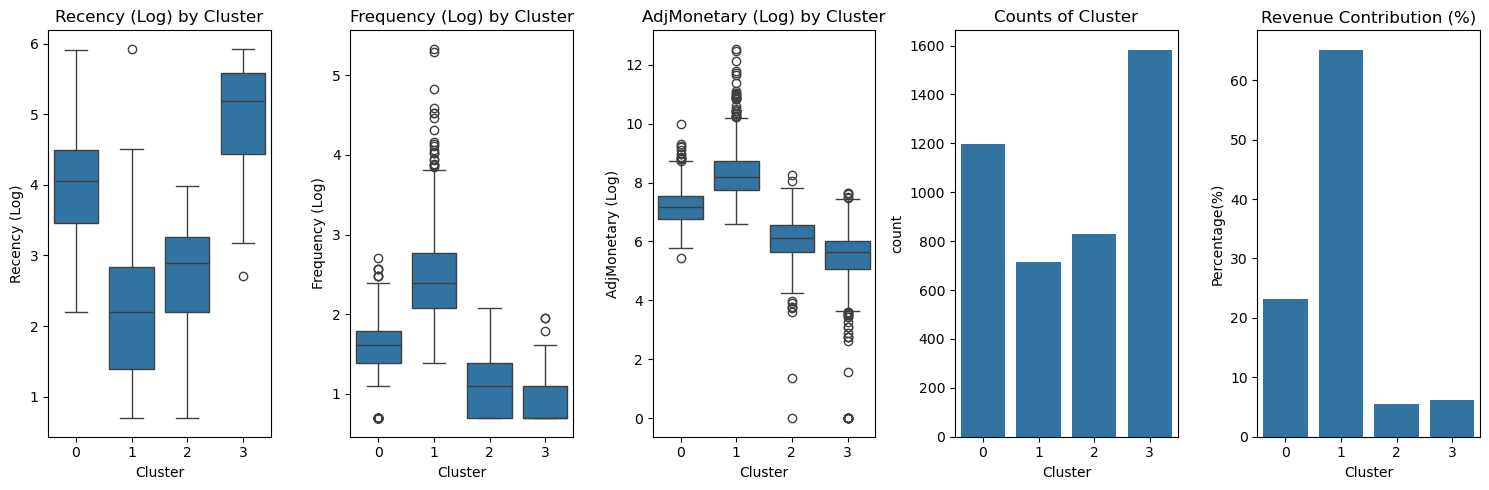

In [107]:
# Create a copy of the DataFrame
rfm_log_cluster = rfm_log.copy()

# Add the labels
rfm_log_cluster['Cluster'] = kmeans_labels_4

# Plot the summary statistics
# Create a grid
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot the graphs
for i, col in enumerate(['Recency', 'Frequency', 'AdjMonetary']):
    sns.boxplot(data=rfm_log_cluster, x='Cluster', y=col, ax=axes[i])
    axes[i].set_title(f'{col} (Log) by Cluster')
    axes[i].set_ylabel(f'{col} (Log)')

sns.countplot(data=rfm_log_cluster, x='Cluster', ax=axes[3])
axes[3].set_title('Counts of Cluster')

sns.barplot(data=cluster_profile['AdjMonetary'].reset_index(), x='Cluster', y='%_total_sum', ax=axes[4])
axes[4].set_title('Revenue Contribution (%)')
axes[4].set_ylabel('Percentage(%)')

plt.tight_layout()
plt.show()

Using log transformed features make cluster differences clear and interpretable. 
- **Cluster 1 - VIP Customer**
  - Recency
  Very recent purchasers (lowest recency values)

  - Frequency
  Highest purchasing frequency among all clusters

  - Monetary
  Top spenders, contributing **over 60% of total revenue**

  - Interpretation / Business Value
  These are the most **valuable and highly engaged** customers. Retention and loyalty efforts should prioritize this group.

- **Cluster 0 - Stable but Passive customers**
  - Recency
  Not very recent (3rd lowest recency values)

  - Frequency
  Moderate frequency (2nd highest)

  - Monetary
  The 2nd highest spenders, contributing **over 20% of total revenue**

  - Interpretation / Business Value
  Solid revenue contributors but **low engagement** - strong potential to **upsell** and convert into VIPs through re-engagement campaigns.

- **Cluster 2 - Occasional but Reachable Customers**
  - Recency
  Somewhat recent activity (still reachable)

  - Frequency
  Rare buyers (low purchase frequency)

  - Monetary
  Low spending, small revenue share

  - Interpretation / Business Value
  Customers with **low engagement but not lost yet** - target with promotional incentives could increase activity.

- **Cluster 3 - Largest Churn / At-Risk Customers**
  - Recency
  Not recent at all (highest recency) - high churn risk

  - Frequency
  Very infrequent purchases

  - Monetary
  Minimal contribution

  - Interpretation / Business Value
  This is **the largest customer group** but least active. This represents **the biggest opportunity for reactivation**.(win-back campaigns)
   
  


### Additional Behavioral Insights by Customer Segment
While RFM provides a strong insights of purchase behavior, further analysis is conducted on:
- Discount usage
- Cancellation/return behavior
- Geographical distribution

These insights help validate the clusters and support more actionable marketing strategies.

**Discount Sensitivity by Cluster**

In [136]:
# Compute the discount rate
discount_rate  = rfm_final_cluster.groupby('Cluster')['HadDiscounts'].sum() / rfm_final_cluster.groupby('Cluster')['Frequency'].sum()
discount_rate 

Cluster
0    0.000625
1    0.007249
2    0.000562
3    0.000000
dtype: float64

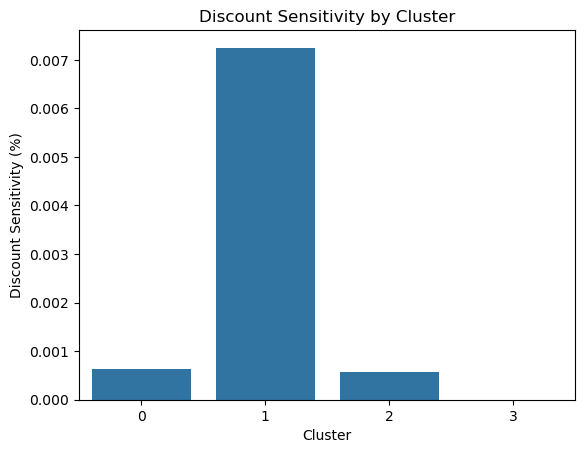

In [137]:
# Plot the graph
sns.barplot(x=discount_rate.index, y=discount_rate.values)
plt.ylabel('Discount Sensitivity (%)')
plt.title('Discount Sensitivity by Cluster')
plt.show()

**Discount usage is extremely low across all clusters (all below 1%)**, meaning promotions do not strongly influence purchasing decisions.

**VIP customers** show a slightly higher discount usage(~0.7%). However, since they already purchase frequently and generate the highest revenue, increasing discounts for them would mainly reduce margins. **Exclusive benefits**(e.g., loyalty rewards, early access) are more suitable than price reductions.

**Other clusters** show almost no discount response, indicating discounts are not an effective engagement strategy for these groups. Alternative actions such as personalized outreach, tailored product recommendations, and targeted reactivation campaigns should be prioritized instead.

**NOTE**: Even if discount campaigns are available, customers may not be aware of them, which could explain why discounts have little to no effect on purchasing behavior. If that is the case, better targeted and clearly communicated discount campaigns might be effective. Therefore, further investigation into discount visibility and communication is valuable. 

**Cancellation Rate by Cluster**

In [138]:
# Compute the cancel rate
cancel_rate = rfm_final_cluster.groupby('Cluster')['HadCancellation'].sum() / rfm_final_cluster.groupby('Cluster')['Frequency'].sum() * 100

cancel_rate

Cluster
0    47.928378
1    50.372639
2    26.644182
3    37.869249
dtype: float64

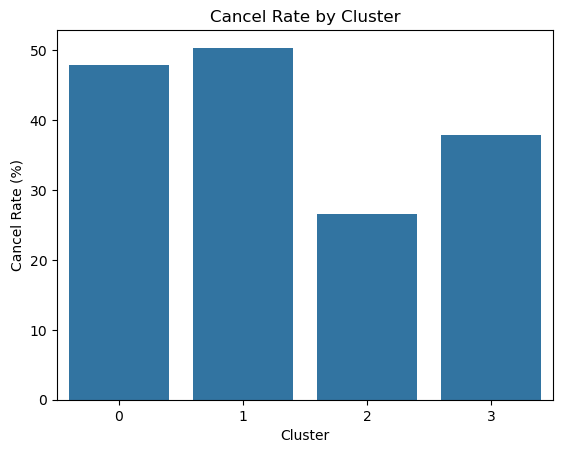

In [140]:
# Plot the graph
sns.barplot(x=cancel_rate.index, y=cancel_rate.values)
plt.ylabel('Cancel Rate (%)')
plt.title('Cancel Rate by Cluster')
plt.show()

Cancellation rates are **very high across all customer groups**, raising possible operational concerns.
- VIP customers(Cluster 1)
Having the highest cancellation rate **(more than 50%)**. Despite strong engagement, many purchases result in issues, suggesting **quality or fulfillment problems** may exist.

- Stable but Passive Customers(Cluster 0)
High cancellation rate **(more than 47%)**, which may damage trust and **prevent them from becoming VIPs**

- Largest Churn / At-Risk Customers(Cluster 3)
Cancellation rate **(more than 37%). Poor past experience may be reason for inactivity.**

- Occasional but Reachable Customers(Cluster 2)
Lowest cancellation rate **(more than 26%), likely because they purchase less frequently** 

**Country Analysis by Cluster**

In [151]:
# Customer count by Country and Cluster
country_cluster = rfm_final_cluster.groupby(['Country', 'Cluster']).size().reset_index(name='Customer_counts')
country_cluster

,Country,Cluster,Customer_counts
0,Australia,0,5
1,Australia,1,3
2,Australia,3,1
3,Austria,0,2
4,Austria,2,2
...,...,...,...
92,United Kingdom,1,636
93,United Kingdom,2,761
94,United Kingdom,3,1448
95,Unspecified,0,1


In [170]:
# Make a percentage columns
country_cluster['Country_pct'] = country_cluster['Customer_counts'] / country_cluster.groupby('Cluster')['Customer_counts'].transform('sum') * 100
country_cluster

,Country,Cluster,Customer_counts,Country_pct
0,Australia,0,5,0.417362
1,Australia,1,3,0.419580
2,Australia,3,1,0.063171
3,Austria,0,2,0.166945
4,Austria,2,2,0.240964
...,...,...,...,...
92,United Kingdom,1,636,88.951049
93,United Kingdom,2,761,91.686747
94,United Kingdom,3,1448,91.471889
95,Unspecified,0,1,0.083472


In [154]:
# Check the number of the unique countries
country_cluster['Country'].nunique()

37

There are 37 unique countries in the dataset. Visualizing all countries across clusters would be difficult to interpret. Therefore, I will focus on the **Top 10 countries** based on the number of customers in each cluster.

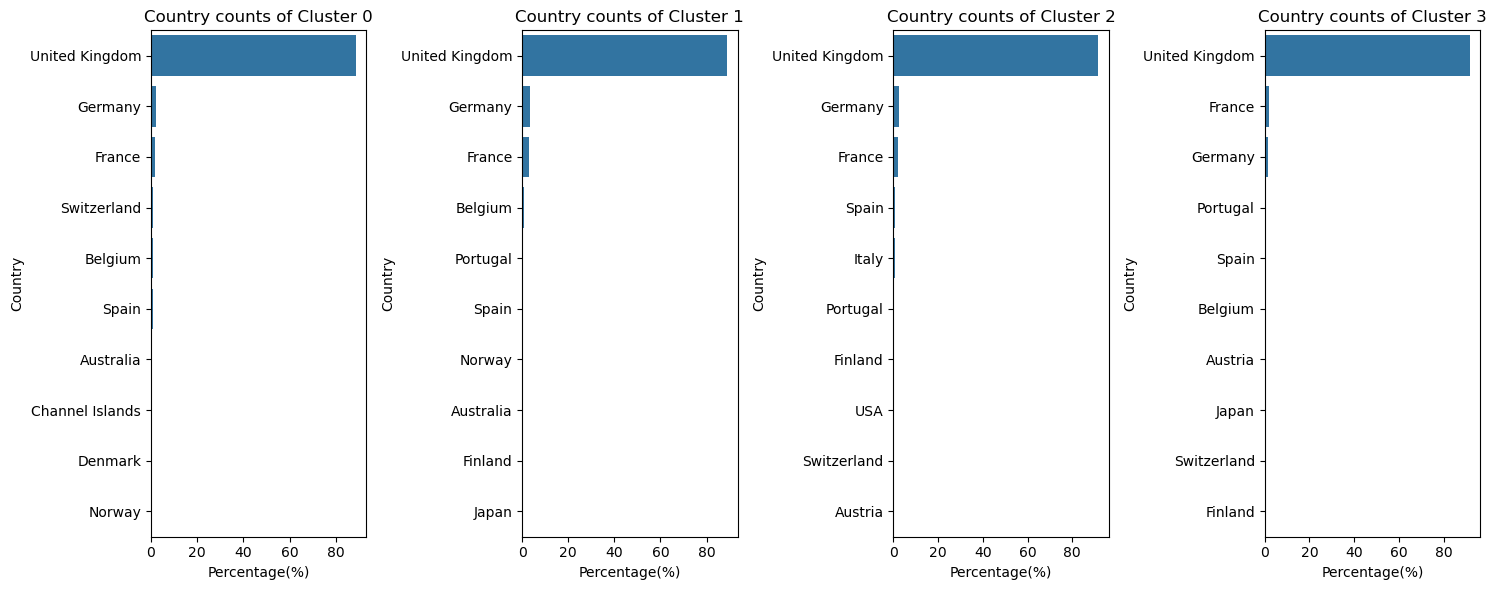

In [172]:
# Slice the DataFrame to each cluster and sort them 
country_c0 = country_cluster[country_cluster['Cluster']==0].sort_values(by='Country_pct', ascending=False)
country_c1 = country_cluster[country_cluster['Cluster']==1].sort_values(by='Country_pct', ascending=False)
country_c2 = country_cluster[country_cluster['Cluster']==2].sort_values(by='Country_pct', ascending=False) 
country_c3 = country_cluster[country_cluster['Cluster']==3].sort_values(by='Country_pct', ascending=False)

#Slice the top 10 countries in each cluster 
country_c0_10 = country_c0.iloc[0:10, :]
country_c1_10 = country_c1.iloc[0:10, :]
country_c2_10 = country_c2.iloc[0:10, :]
country_c3_10 = country_c3.iloc[0:10, :]

# Plot top 10 countries in each cluster
# Create a grid
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

# Plot the graphs
for i, col in enumerate([country_c0_10, country_c1_10, country_c2_10, country_c3_10]):
    sns.barplot(data=col, x='Country_pct', y='Country', ax=axes[i])
    axes[i].set_title(f'Country counts of Cluster {i}')
    axes[i].set_xlabel(f'Percentage(%)')
    
plt.tight_layout()
plt.show()

Most customers across all the clusters come from **the United Kingdom**, which dominates the distribution. To better understand international patterns, I will visualize the country breakdown excluding the UK.

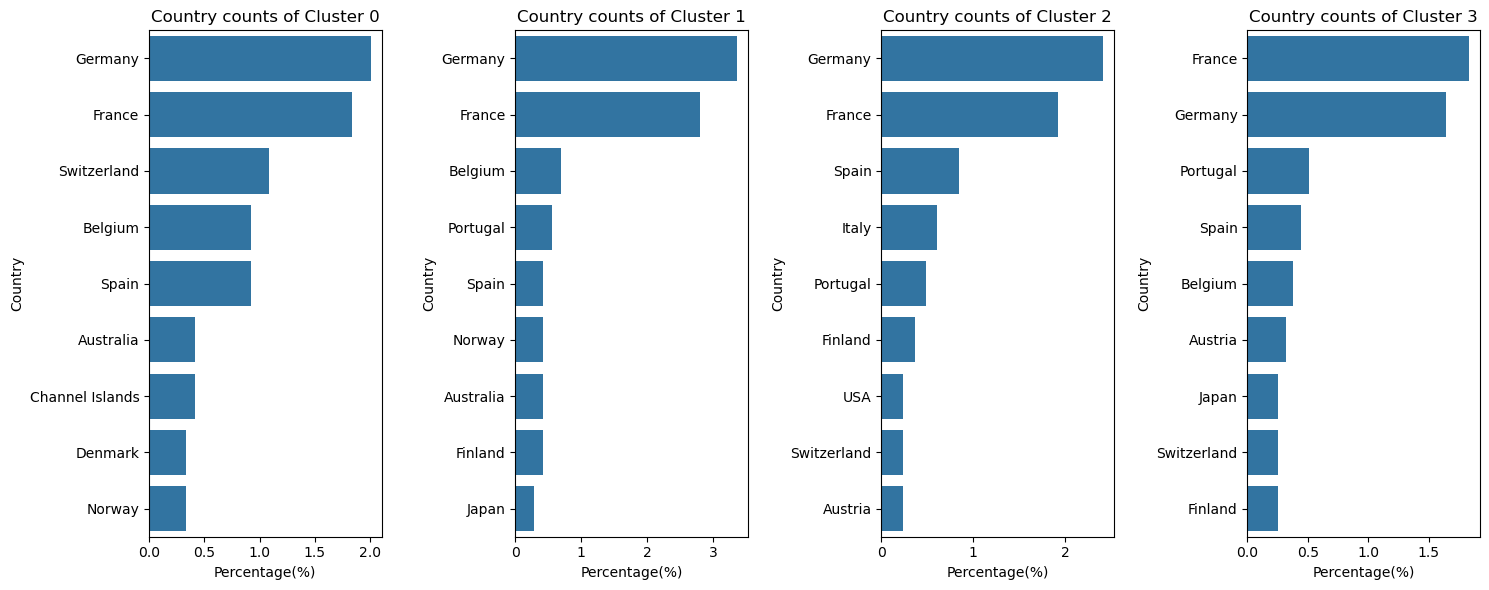

In [173]:
#Slice the top 10 countries without UK in each cluster 
country_c0_9 = country_c0.iloc[1:10, :]
country_c1_9 = country_c1.iloc[1:10, :]
country_c2_9 = country_c2.iloc[1:10, :]
country_c3_9 = country_c3.iloc[1:10, :]

# Plot top 10 countries in each cluster
# Create a grid
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

# Plot the graphs
for i, col in enumerate([country_c0_9, country_c1_9, country_c2_9, country_c3_9]):
    sns.barplot(data=col, x='Country_pct', y='Country', ax=axes[i])
    axes[i].set_title(f'Country counts of Cluster {i}')
    axes[i].set_xlabel(f'Percentage(%)')
    
plt.tight_layout()
plt.show()

While the United Kingdom is the **primary market across all clusters**, **Germany and France** shoe up repeatedly within the top countries in every segment.

- Strategic Recommendation
    If expanding international business:
    1. **The United Kingdom** remains the top priority(core market)
    2. **Germany and France** should be next key target markets due to consistent presence across customer groups.

### Conclusion 
This RFM segmentation successfully identified four distinct customers groups with clear behavioral differences. The analysis reveals;
- **VIP customers(Cluster 1)** are most profitable and should be prioritized with loyalty-driven strategies
- **Cluster 0** offers strong upsell potential with improved engagement
- **Cluster 2** needs activation strategies
- **Cluster 3** represents largest churn risk and win-back opportunity
- **Discount promotions** currently show very low effectiveness
- **Cancellation rates** are hight across all groups (Operational improvement required)
- **UK dominates** as the core marked; **Germany & France** are key expansion targets.

**Next business actions** may include:
- Loyalty program for VIPs
- Personalized re-engagement for less active groups
- Investigation into operational failures causing cancellations
- Strategic marketing efforts in DE & FR